# Multiple Linear Regression
## Giley Auto Price Prediction

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

Essentially, the company wants —


- Which variables are significant in predicting the price of a car.

- How well those variables describe the price of a car.

## Reading and Understanding the Data

Let us first import NumPy and Pandas and read the car price dataset

In [177]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [178]:
import numpy as np
import pandas as pd

In [179]:
car = pd.read_csv("CarPrice_Assignment.csv")

In [180]:
# Check the head of the dataset
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

Inspect the various aspects of the car dataframe

In [181]:
car.shape

(205, 26)

In [182]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [183]:
car.describe(include='all')

car_ID   symboling      CarName fueltype aspiration doornumber  \
count   205.000000  205.000000          205      205        205        205   
unique         NaN         NaN          147        2          2          2   
top            NaN         NaN  peugeot 504      gas        std       four   
freq           NaN         NaN            6      185        168        115   
mean    103.000000    0.834146          NaN      NaN        NaN        NaN   
std      59.322565    1.245307          NaN      NaN        NaN        NaN   
min       1.000000   -2.000000          NaN      NaN        NaN        NaN   
25%      52.000000    0.000000          NaN      NaN        NaN        NaN   
50%     103.000000    1.000000          NaN      NaN        NaN        NaN   
75%     154.000000    2.000000          NaN      NaN        NaN        NaN   
max     205.000000    3.000000          NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocation   wheelbase      ...       \
count      205        205            205  205.000000      ...        
unique       5          3              2         NaN      ...        
top      sedan        fwd          front         NaN      ...        
freq        96        120            202         NaN      ...        
mean       NaN        NaN            NaN   98.756585      ...        
std        NaN        NaN            NaN    6.021776      ...        
min        NaN        NaN            NaN   86.600000      ...        
25%        NaN        NaN            NaN   94.500000      ...        
50%        NaN        NaN            NaN   97.000000      ...        
75%        NaN        NaN            NaN  102.400000      ...        
max        NaN        NaN            NaN  120.900000      ...        

        enginesize  fuelsystem   boreratio      stroke compressionratio  \
count   205.000000         205  205.000000  205.000000       205.000000   
unique         NaN           8         NaN         NaN              NaN   
top            NaN        mpfi         NaN         NaN              NaN   
freq           NaN          94         NaN         NaN              NaN   
mean    126.907317         NaN    3.329756    3.255415        10.142537   
std      41.642693         NaN    0.270844    0.313597         3.972040   
min      61.000000         NaN    2.540000    2.070000         7.000000   
25%      97.000000         NaN    3.150000    3.110000         8.600000   
50%     120.000000         NaN    3.310000    3.290000         9.000000   
75%     141.000000         NaN    3.580000    3.410000         9.400000   
max     326.000000         NaN    3.940000    4.170000        23.000000   

        horsepower      peakrpm     citympg  highwaympg         price  
count   205.000000   205.000000  205.000000  205.000000    205.000000  
unique         NaN          NaN         NaN         NaN           NaN  
top            NaN          NaN         NaN         NaN           NaN  
freq           NaN          NaN         NaN         NaN           NaN  
mean    104.117073  5125.121951   25.219512   30.751220  13276.710571  
std      39.544167   476.985643    6.542142    6.886443   7988.852332  
min      48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%      70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%      95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%     116.000000  5500.000000   30.000000   34.000000  16503.000000  
max     288.000000  6600.000000   49.000000   54.000000  45400.000000  

[11 rows x 26 columns]

In [184]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [185]:
round(100*(car.isnull().sum()/ len(car.index)),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [186]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [187]:
# car_ID is unique for each row hence dropping the column
car.drop('car_ID', axis=1,  inplace= True)

In [188]:
#Splitting the CarName column on the basis of space to get the car name
car.CarName = car.CarName.str.split(' ', expand = True)[0].str.lower()

In [189]:
car.CarName.nunique()

27

In [190]:
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [191]:
#Replacing the repeated value to combine them in a single value
car.CarName.replace(['maxda'],'mazda', inplace = True)
car.CarName.replace(['porcshce'],'porsche', inplace = True)
car.CarName.replace(['toyouta'],'toyota', inplace = True)
car.CarName.replace(['vokswagen','vw'],'volkswagen', inplace = True)

In [196]:
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [197]:
car.nunique()

symboling             6
CarName              22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Creating Derived Metric

Since wheelbase gives an indication of the level of the interior space available. Level of interior volume can be given by volume = wheelbase * carwidth * carheight

In [198]:
car['Volume']  = car['wheelbase'] * car['carheight'] * car['carwidth']

We can also calculate power-to-weight ratio = horsepower/curbweight. Generally the higher this ratio the better the performance of the car is considered

In [199]:
car['p2wratio'] = car['horsepower']/car['curbweight']

## Visualising the Data

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

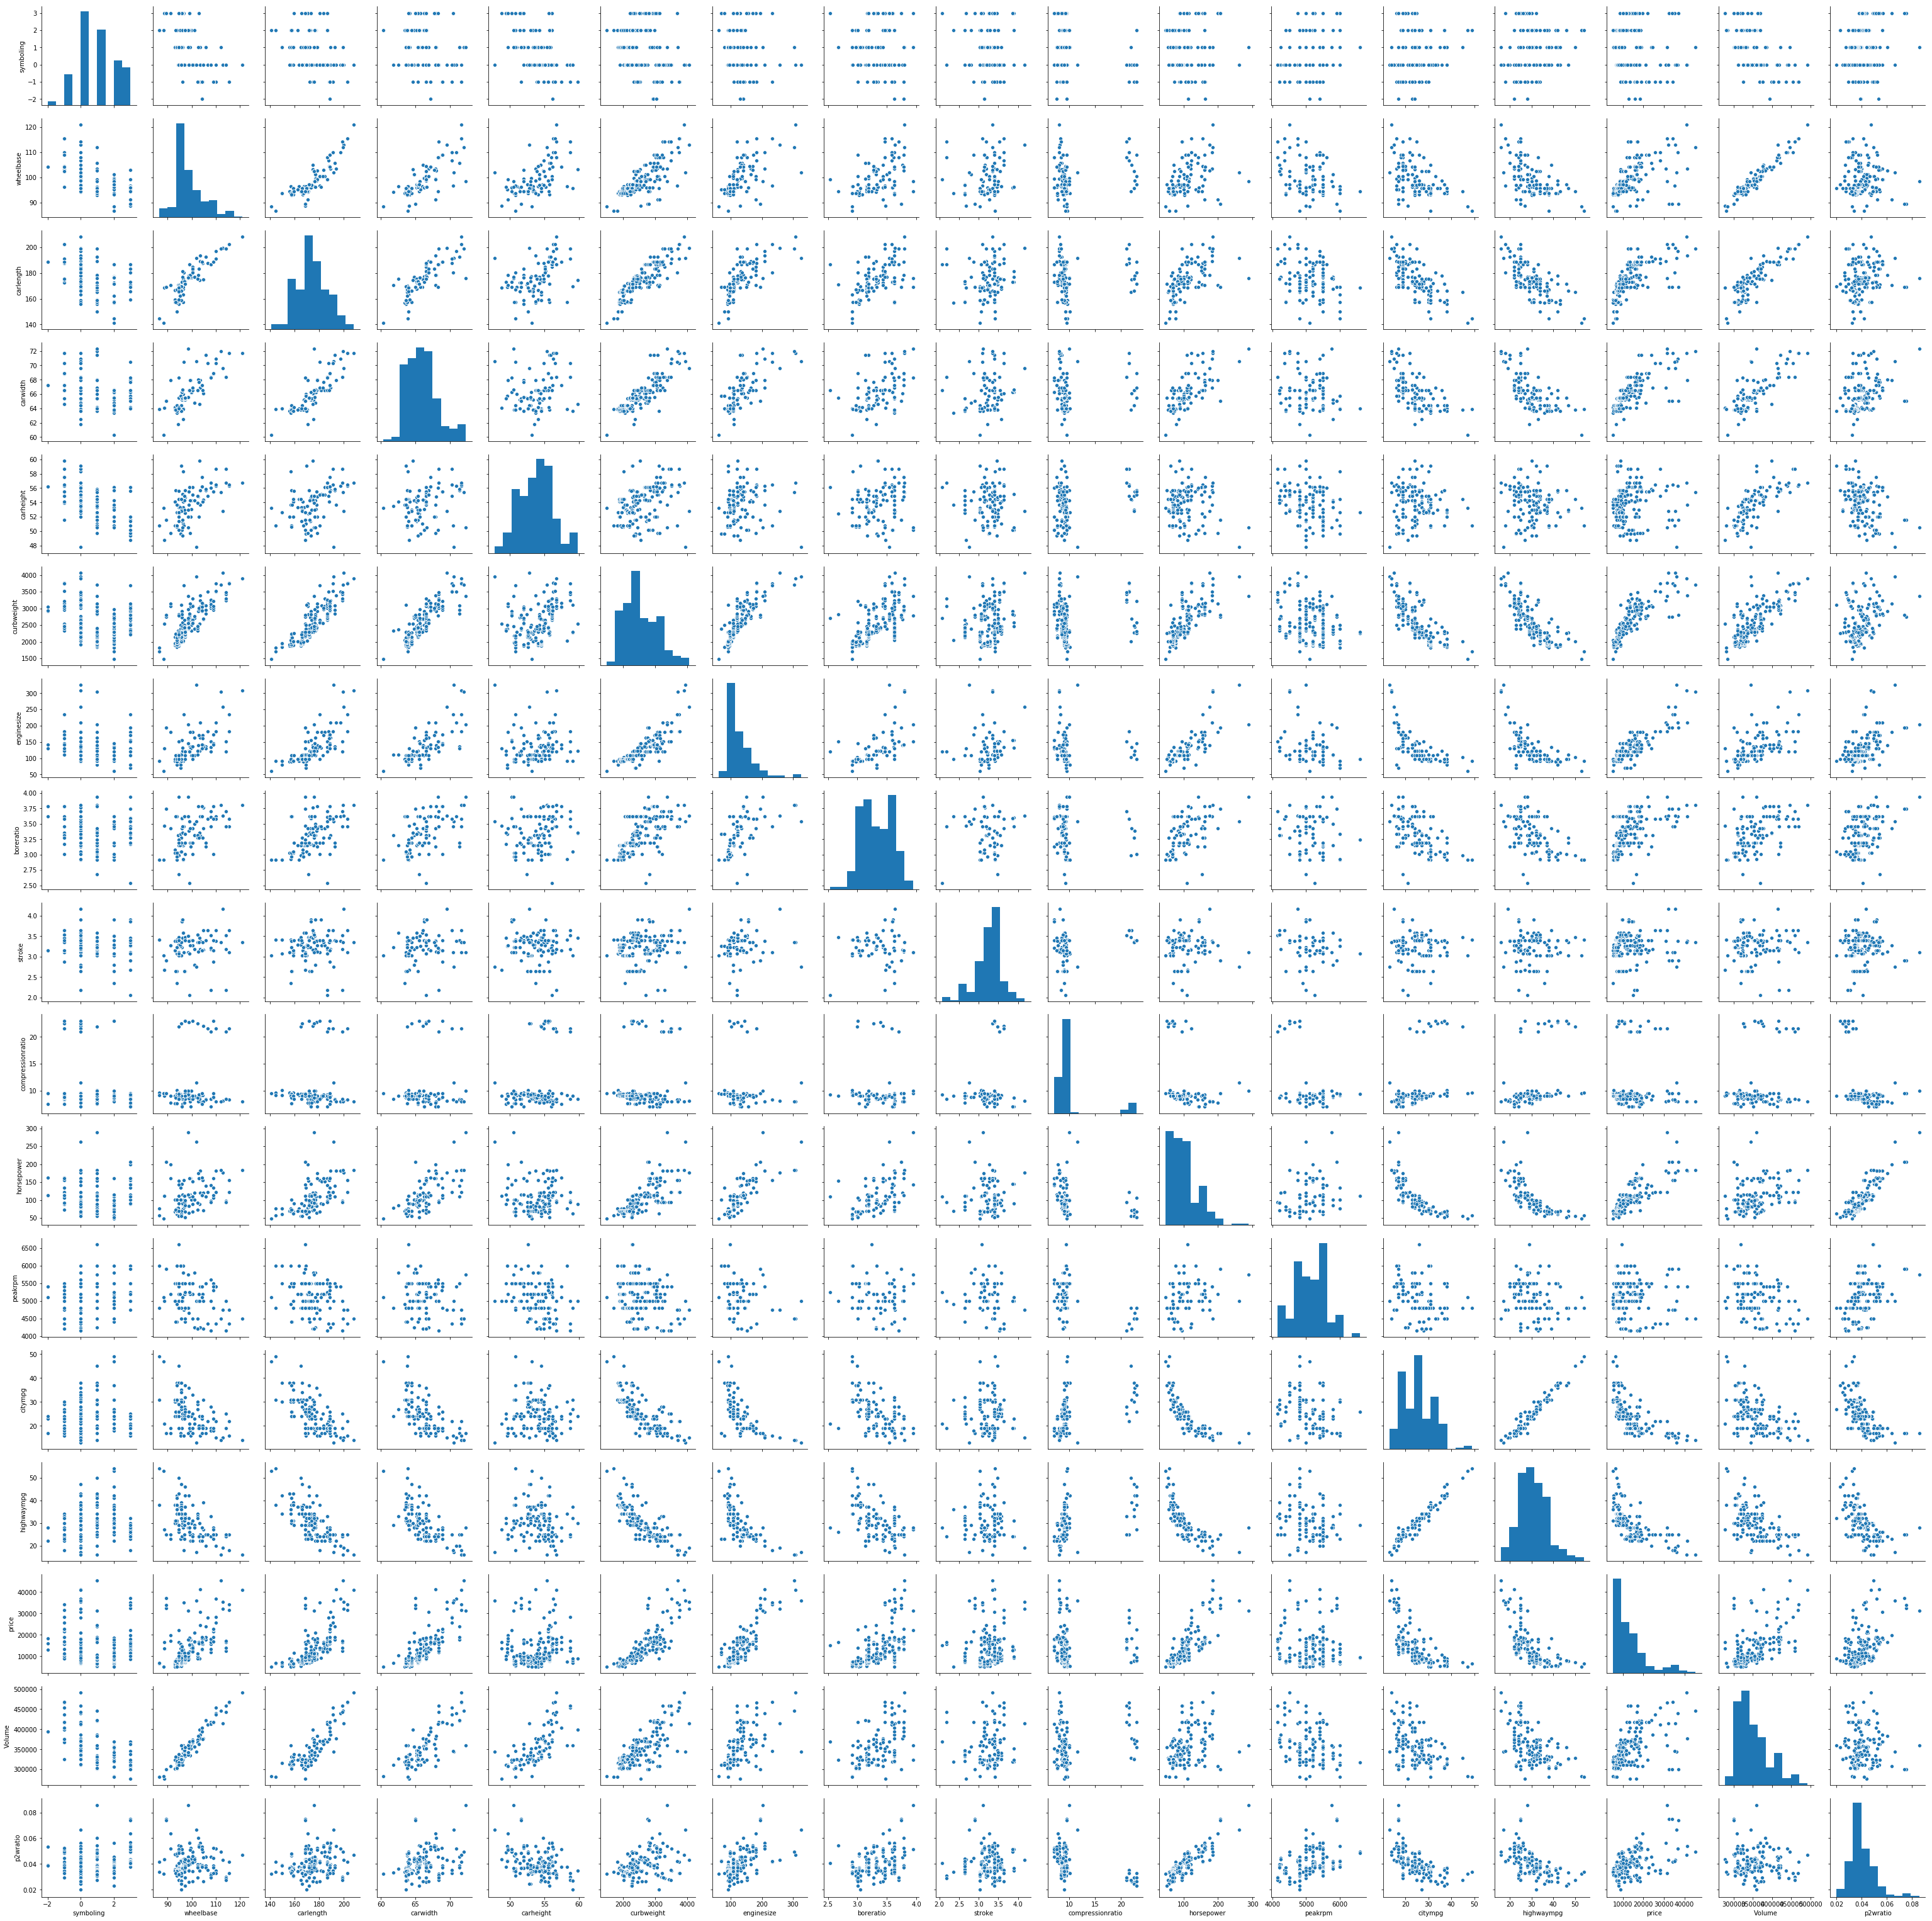

In [201]:
sns.pairplot(car)
plt.show()

Showing pairplot with price

<Figure size 1728x1296 with 0 Axes>

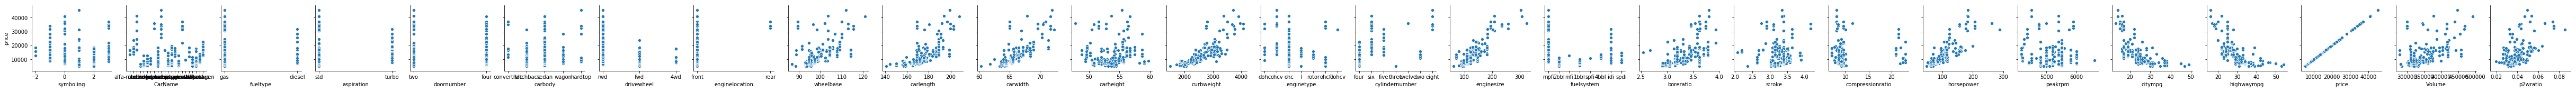

In [202]:
plt.figure(figsize=(24, 18))
pp =sns.pairplot(data=car, x_vars=car.columns, y_vars=['price'])
plt.show()

The pattern can be observed among various variables with many of them showing linear relationship and good degree of correlation. 

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [203]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

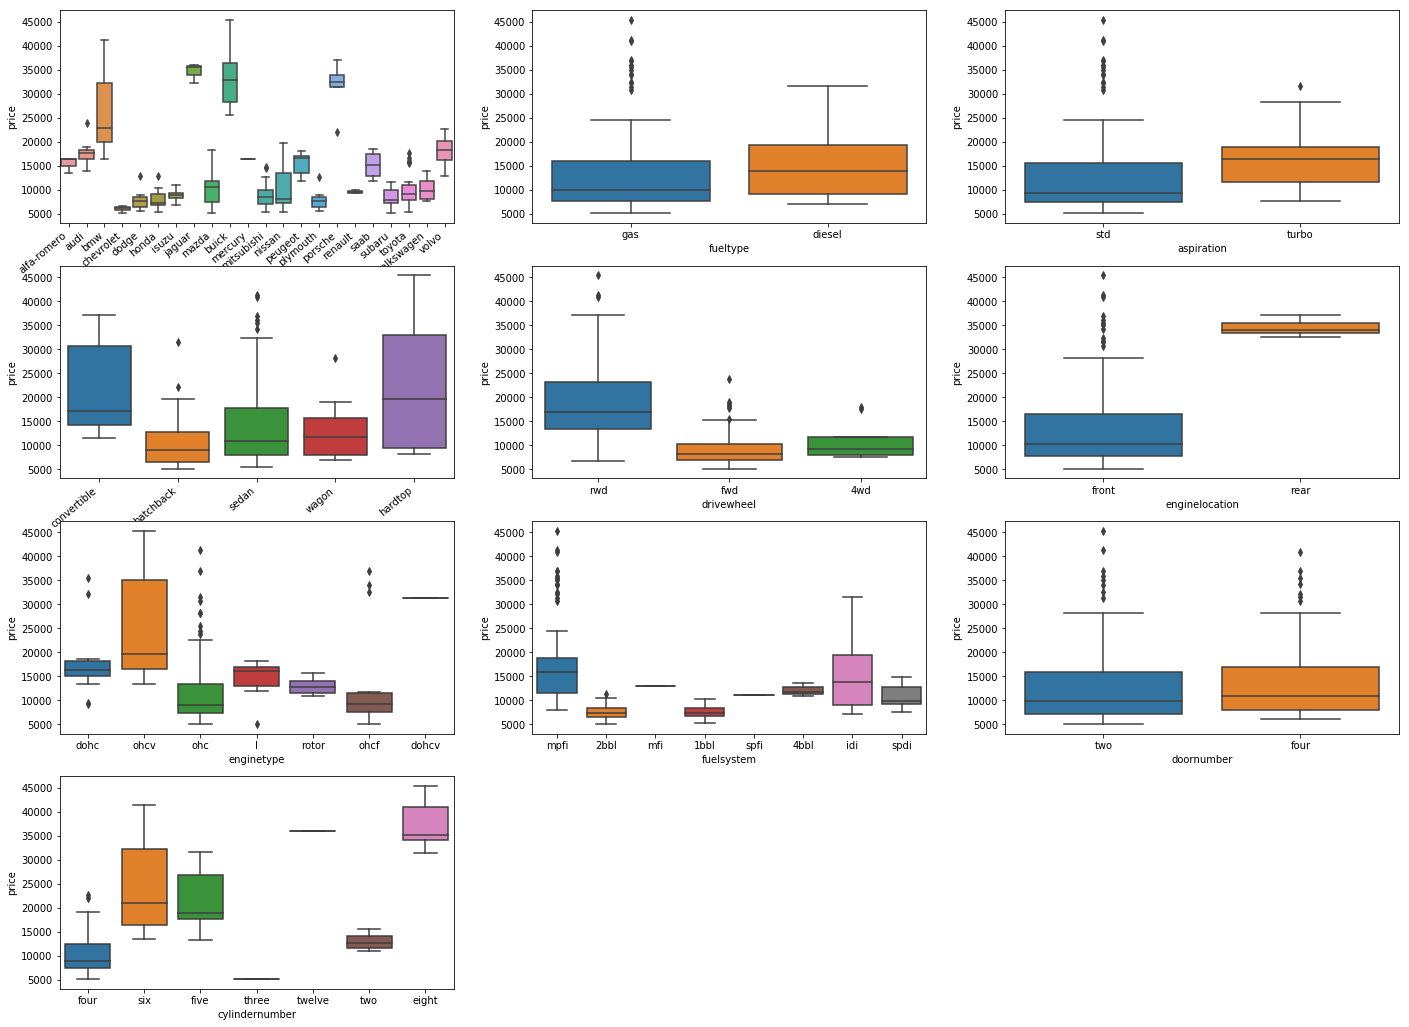

In [204]:
plt.figure(figsize=(24, 18))
plt.subplot(4,3,1)
bx1 = sns.boxplot(x = 'CarName', y = 'price', data = car)
bx1.set_xticklabels(bx1.get_xticklabels(), rotation=40, ha="right")
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(4,3,4)
bx2 = sns.boxplot(x = 'carbody', y = 'price', data = car)
bx2.set_xticklabels(bx2.get_xticklabels(), rotation=40, ha="right")
plt.subplot(4,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(4,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(4,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.subplot(4,3,9)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.show()

Few features can be seen having clear impact on the price such as if enginelocation is rear, the price is higher as compared to when it is in front. Similar scenario can be observed in cylindernumber and for drivewheel as well. There is very less or no overlap between different categories in these variables

##  Data Preparation

In [205]:
#Preparing the list of categorical variables
categorical = ['CarName','fueltype', 'aspiration', 'carbody', 'doornumber','cylindernumber', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

In [206]:
car[categorical].nunique()

CarName           22
fueltype           2
aspiration         2
carbody            5
doornumber         2
cylindernumber     7
drivewheel         3
enginelocation     2
enginetype         7
fuelsystem         8
dtype: int64

In [207]:
print(car.fueltype.unique())
print(car.aspiration.unique())
print(car.enginelocation.unique())
print(car.doornumber.unique())

['gas' 'diesel']
['std' 'turbo']
['front' 'rear']
['two' 'four']


In [208]:
#Mapping the columns with 2 values as 0 and 1
car[['fueltype']] = car[['fueltype']].apply(lambda x : x.map({'gas' : 0, 'diesel' : 1}))
car[['aspiration']] = car[['aspiration']].apply(lambda x : x.map({'std' : 0, 'turbo' : 1}))
car[['enginelocation']] = car[['enginelocation']].apply(lambda x : x.map({'front' : 0, 'rear' : 1}))
car[['doornumber']] = car[['doornumber']].apply(lambda x : x.map({'two' : 0, 'four' : 1}))

In [209]:
# Check the car dataframe now

car.head()

symboling      CarName  fueltype  aspiration  doornumber      carbody  \
0          3  alfa-romero         0           0           0  convertible   
1          3  alfa-romero         0           0           0  convertible   
2          1  alfa-romero         0           0           0    hatchback   
3          2         audi         0           0           1        sedan   
4          2         audi         0           0           1        sedan   

  drivewheel  enginelocation  wheelbase  carlength    ...     boreratio  \
0        rwd               0       88.6      168.8    ...          3.47   
1        rwd               0       88.6      168.8    ...          3.47   
2        rwd               0       94.5      171.2    ...          2.68   
3        fwd               0       99.8      176.6    ...          3.19   
4        4wd               0       99.4      176.6    ...          3.19   

   stroke  compressionratio horsepower peakrpm  citympg highwaympg    price  \
0    2.68               9.0        111    5000       21         27  13495.0   
1    2.68               9.0        111    5000       21         27  16500.0   
2    3.47               9.0        154    5000       19         26  16500.0   
3    3.40              10.0        102    5500       24         30  13950.0   
4    3.40               8.0        115    5500       18         22  17450.0   

       Volume  p2wratio  
0  277147.888  0.043564  
1  277147.888  0.043564  
2  324342.900  0.054552  
3  358747.068  0.043646  
4  358388.688  0.040722  

[5 rows x 27 columns]

### Dummy Variables

The categorical variable has varying number of levels. We need to convert these levels into integer using `dummy variables`.

In [210]:
car[categorical].nunique()

CarName           22
fueltype           2
aspiration         2
carbody            5
doornumber         2
cylindernumber     7
drivewheel         3
enginelocation     2
enginetype         7
fuelsystem         8
dtype: int64

In [211]:
#Dummify the categorical features and dropping the first column

cName = pd.get_dummies(car['CarName'], prefix = 'CarName', drop_first = True)
crbody = pd.get_dummies(car['carbody'], prefix = 'carbody',drop_first= True)
drwheel = pd.get_dummies(car['drivewheel'], prefix = 'drivewheel', drop_first= True)
esys = pd.get_dummies(car['enginetype'], prefix = 'enginetype', drop_first= True)
flsys = pd.get_dummies(car['fuelsystem'], prefix = 'fuelsystem', drop_first= True)
cyl = pd.get_dummies(car['cylindernumber'], prefix = 'cylindernumber', drop_first= True)

In [212]:
# Add the results to the original car dataframe

car = pd.concat([car, cName, crbody, drwheel,esys, flsys, cyl], axis = 1)

In [213]:
# Drop 'CarName','carbody','drivewheel','enginetype','fuelsystem', 'cylindernumber' as we have created the dummies for it

car.drop(['CarName','carbody','drivewheel','enginetype','fuelsystem','cylindernumber'], axis = 1, inplace = True)

In [214]:
# Now let's see the head of our dataframe.

car.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          3         0           0           0               0       88.6   
1          3         0           0           0               0       88.6   
2          1         0           0           0               0       94.5   
3          2         0           0           1               0       99.8   
4          2         0           0           1               0       99.4   

   carlength  carwidth  carheight  curbweight         ...          \
0      168.8      64.1       48.8        2548         ...           
1      168.8      64.1       48.8        2548         ...           
2      171.2      65.5       52.4        2823         ...           
3      176.6      66.2       54.3        2337         ...           
4      176.6      66.4       54.3        2824         ...           

   fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
0               0                1                0                0   
1               0                1                0                0   
2               0                1                0                0   
3               0                1                0                0   
4               0                1                0                0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    1                    0                   0   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
0                     0                      0                   0  
1                     0                      0                   0  
2                     0                      0                   0  
3                     0                      0                   0  
4                     0                      0                   0  

[5 rows x 67 columns]

In [215]:
car.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  205.000000  205.000000  205.000000  205.000000      205.000000   
mean     0.834146    0.097561    0.180488    0.560976        0.014634   
std      1.245307    0.297446    0.385535    0.497483        0.120377   
min     -2.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      1.000000    0.000000    0.000000    1.000000        0.000000   
75%      2.000000    0.000000    0.000000    1.000000        0.000000   
max      3.000000    1.000000    1.000000    1.000000        1.000000   

        wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

              ...          fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
count         ...              205.000000       205.000000       205.000000   
mean          ...                0.004878         0.458537         0.043902   
std           ...                0.069843         0.499498         0.205380   
min           ...                0.000000         0.000000         0.000000   
25%           ...                0.000000         0.000000         0.000000   
50%           ...                0.000000         0.000000         0.000000   
75%           ...                0.000000         1.000000         0.000000   
max           ...                1.000000         1.000000         1.000000   

       fuelsystem_spfi  cylindernumber_five  cylindernumber_four  \
count       205.000000           205.000000           205.000000   
mean          0.004878             0.053659             0.775610   
std           0.069843             0.225894             0.418201   
min           0.000000             0.000000             0.000000   
25%           0.000000             0.000000             1.000000   
50%           0.000000             0.000000             1.000000   
75%           0.000000             0.000000             1.000000   
max           1.000000             1.000000             1.000000   

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count          205.000000            205.000000             205.000000   
mean             0.117073              0.004878               0.004878   
std              0.322294              0.069843               0.069843   
min              0.000000              0.000000               0.000000   
25%              0.000000              0.000000               0.000000   
50%              0.000000              0.000000               0.000000   
75%              0.000000              0.000000               0.000000   
max              1.000000              1.000000               1.000000   

       cylindernumber_two  
count          205.000000  
mean             0.019512  
std              0.138655  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000  

[8 rows x 67 columns]

## Splitting the Data into Training and Testing Sets

Performing a train-test split.

In [216]:
from sklearn.model_selection import train_test_split
#Splitting the dataframe into 70/30 ratio
# We specify the seed to 0, so that the train and test data set always have the same 
#rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

Checking for the value counts and uniqueness in the training dataset

In [217]:
df_train.columns[df_train.nunique() == 1]

Index(['CarName_mercury', 'fuelsystem_mfi', 'fuelsystem_spfi'], dtype='object')

In [218]:
car.fuelsystem_mfi.value_counts()

0    204
1      1
Name: fuelsystem_mfi, dtype: int64

In [219]:
car.fuelsystem_spfi.value_counts()

0    204
1      1
Name: fuelsystem_spfi, dtype: int64

In [220]:
car.CarName_mercury.value_counts()

0    204
1      1
Name: CarName_mercury, dtype: int64

From the above tests we can see that 3 columns have only one value in the train dataset. This is because overall these columns are highly imbalanced having only one value in total of 205 rows

### Rescaling the Features 

Using MinMax scaling.

In [221]:
from sklearn.preprocessing import MinMaxScaler

In [222]:
scaler = MinMaxScaler()

In [223]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'Volume','p2wratio','carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [224]:
df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
122        0.6         0           0           1               0   0.244828   
125        1.0         0           0           0               0   0.272414   
166        0.6         0           0           0               0   0.272414   
1          1.0         0           0           0               0   0.068966   
199        0.2         0           1           1               0   0.610345   

     carlength  carwidth  carheight  curbweight         ...          \
122   0.426016  0.291667   0.265487    0.272692         ...           
125   0.452033  0.666667   0.212389    0.500388         ...           
166   0.448780  0.308333   0.424779    0.314973         ...           
1     0.450407  0.316667   0.088496    0.411171         ...           
199   0.775610  0.575000   0.858407    0.647401         ...           

     fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  \
122               0                0                0                0   
125               0                1                0                0   
166               0                1                0                0   
1                 0                1                0                0   
199               0                1                0                0   

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122                    0                    1                   0   
125                    0                    1                   0   
166                    0                    1                   0   
1                      0                    1                   0   
199                    0                    1                   0   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  
122                     0                      0                   0  
125                     0                      0                   0  
166                     0                      0                   0  
1                       0                      0                   0  
199                     0                      0                   0  

[5 rows x 67 columns]

In [225]:
df_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.559441    0.090909    0.181818    0.559441        0.006993   
std      0.239200    0.288490    0.387050    0.498199        0.083624   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.400000    0.000000    0.000000    0.000000        0.000000   
50%      0.600000    0.000000    0.000000    1.000000        0.000000   
75%      0.600000    0.000000    0.000000    1.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

        wheelbase   carlength    carwidth   carheight  curbweight  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.509004    0.407878   
std      0.205581    0.204848    0.184517    0.215378    0.211269   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.353982    0.245539   
50%      0.341379    0.502439    0.425000    0.522124    0.355702   
75%      0.503448    0.669919    0.550000    0.668142    0.559542   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

              ...          fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
count         ...                   143.0       143.000000       143.000000   
mean          ...                     0.0         0.440559         0.041958   
std           ...                     0.0         0.498199         0.201198   
min           ...                     0.0         0.000000         0.000000   
25%           ...                     0.0         0.000000         0.000000   
50%           ...                     0.0         0.000000         0.000000   
75%           ...                     0.0         1.000000         0.000000   
max           ...                     0.0         1.000000         1.000000   

       fuelsystem_spfi  cylindernumber_five  cylindernumber_four  \
count            143.0           143.000000           143.000000   
mean               0.0             0.062937             0.741259   
std                0.0             0.243703             0.439483   
min                0.0             0.000000             0.000000   
25%                0.0             0.000000             0.000000   
50%                0.0             0.000000             1.000000   
75%                0.0             0.000000             1.000000   
max                0.0             1.000000             1.000000   

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count          143.000000            143.000000             143.000000   
mean             0.132867              0.006993               0.006993   
std              0.340624              0.083624               0.083624   
min              0.000000              0.000000               0.000000   
25%              0.000000              0.000000               0.000000   
50%              0.000000              0.000000               0.000000   
75%              0.000000              0.000000               0.000000   
max              1.000000              1.000000               1.000000   

       cylindernumber_two  
count          143.000000  
mean             0.027972  
std              0.165472  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000  

[8 rows x 67 columns]

In [226]:
#Checking for null values among all the columns combined
round(100*(car.isnull().sum()/ len(car.index)),2).sum()

0.0

In [227]:
#Calculating correlation among all the variables
corr_all = df_train.corr()
corr_all

symboling  fueltype    aspiration  doornumber  \
symboling               1.000000 -0.272756 -1.023416e-01   -0.659214   
fueltype               -0.272756  1.000000  4.185461e-01    0.231626   
aspiration             -0.102342  0.418546  1.000000e+00    0.089642   
doornumber             -0.659214  0.231626  8.964215e-02    1.000000   
enginelocation          0.155104 -0.026537 -3.955939e-02   -0.094565   
wheelbase              -0.539877  0.393481  2.774139e-01    0.462232   
carlength              -0.390880  0.275886  2.349248e-01    0.436645   
carwidth               -0.263917  0.293054  3.070265e-01    0.245854   
carheight              -0.557179  0.320231  1.110516e-01    0.554436   
curbweight             -0.268481  0.288561  3.256339e-01    0.251023   
enginesize             -0.182393  0.145095  1.150503e-01    0.081539   
boreratio              -0.132768  0.153727  1.866387e-01    0.183979   
stroke                 -0.028788  0.265493  1.995801e-01   -0.014726   
compressionratio       -0.266962  0.983638  3.070062e-01    0.214898   
horsepower              0.038395 -0.100280  2.228997e-01   -0.101487   
peakrpm                 0.343449 -0.486461 -1.524238e-01   -0.333523   
citympg                -0.042737  0.196355 -2.068212e-01   -0.034440   
highwaympg              0.022248  0.142244 -2.523669e-01   -0.064721   
price                  -0.129859  0.191150  2.065405e-01    0.075936   
Volume                 -0.563109  0.418239  2.837371e-01    0.518097   
p2wratio                0.284117 -0.362761  1.355319e-01   -0.346768   
CarName_audi            0.064332 -0.060193  1.076764e-01    0.015551   
CarName_bmw            -0.052187 -0.066178 -9.865272e-02   -0.025056   
CarName_buick          -0.159266  0.337080  2.063797e-01    0.092233   
CarName_chevrolet       0.024909 -0.046291 -6.900656e-02   -0.066670   
CarName_dodge           0.035610 -0.066178  8.221060e-02   -0.095313   
CarName_honda          -0.052546 -0.081954 -1.221694e-01   -0.118033   
CarName_isuzu          -0.056975 -0.046291 -6.900656e-02    0.031617   
CarName_jaguar         -0.097917 -0.046291 -6.900656e-02    0.031617   
CarName_mazda           0.135450  0.069231 -1.490712e-01   -0.062361   
...                          ...       ...           ...         ...   
CarName_saab            0.188676 -0.046291  5.750546e-02    0.031617   
CarName_subaru         -0.105017 -0.091287 -2.832792e-18    0.150451   
CarName_toyota         -0.100556 -0.057382 -1.900886e-01    0.032944   
CarName_volkswagen      0.120186  0.040996 -2.291746e-02    0.005478   
CarName_volvo          -0.374108  0.055149  1.726423e-01    0.185712   
carbody_hardtop         0.188676 -0.046291 -6.900656e-02   -0.164957   
carbody_hatchback       0.431934 -0.177060 -3.472976e-02   -0.605838   
carbody_sedan          -0.378439  0.185979  5.940885e-02    0.450106   
carbody_wagon          -0.279121  0.019545  2.913583e-02    0.347369   
drivewheel_fwd          0.122342 -0.184655 -1.644888e-01   -0.044536   
drivewheel_rwd         -0.072106  0.227232  1.106082e-01   -0.028713   
enginetype_dohcv        0.014279 -0.026537 -3.955939e-02   -0.094565   
enginetype_l           -0.125030  0.318709  2.511261e-01    0.171980   
enginetype_ohc         -0.064765  0.004762 -3.194383e-02   -0.025029   
enginetype_ohcf        -0.054312 -0.095709 -1.188961e-02    0.116173   
enginetype_ohcv        -0.028385 -0.081954 -4.751034e-02   -0.060031   
enginetype_rotor        0.313538 -0.053644 -7.996802e-02   -0.191160   
fuelsystem_2bbl         0.001721 -0.231869 -3.456506e-01    0.030365   
fuelsystem_4bbl         0.270560 -0.046291 -6.900656e-02   -0.164957   
fuelsystem_idi         -0.272756  1.000000  4.185461e-01    0.231626   
fuelsystem_mfi               NaN       NaN           NaN         NaN   
fuelsystem_mpfi         0.020993 -0.280624 -1.660040e-02   -0.006944   
fuelsystem_spdi         0.211203 -0.066178  4.439373e-01   -0.165569   
fuelsystem_spfi              NaN       NaN           NaN       

In [228]:
#Calculating correlation of all the variables with price column
corr_i = df_train.corr()['price']
corr_i.sort_values(ascending = False)

price                    1.000000
enginesize               0.867915
curbweight               0.861860
horsepower               0.806183
carwidth                 0.799380
carlength                0.713749
drivewheel_rwd           0.677169
wheelbase                0.622591
Volume                   0.586028
boreratio                0.533591
fuelsystem_mpfi          0.519993
p2wratio                 0.502558
cylindernumber_six       0.500613
CarName_buick            0.437268
CarName_jaguar           0.405372
CarName_bmw              0.371790
enginetype_ohcv          0.339468
CarName_porsche          0.302801
cylindernumber_five      0.271430
cylindernumber_twelve    0.247489
enginelocation           0.226217
aspiration               0.206540
carbody_sedan            0.205018
enginetype_dohcv         0.197875
fuelsystem_idi           0.191150
fueltype                 0.191150
CarName_volvo            0.161924
compressionratio         0.160847
stroke                   0.152820
CarName_audi  

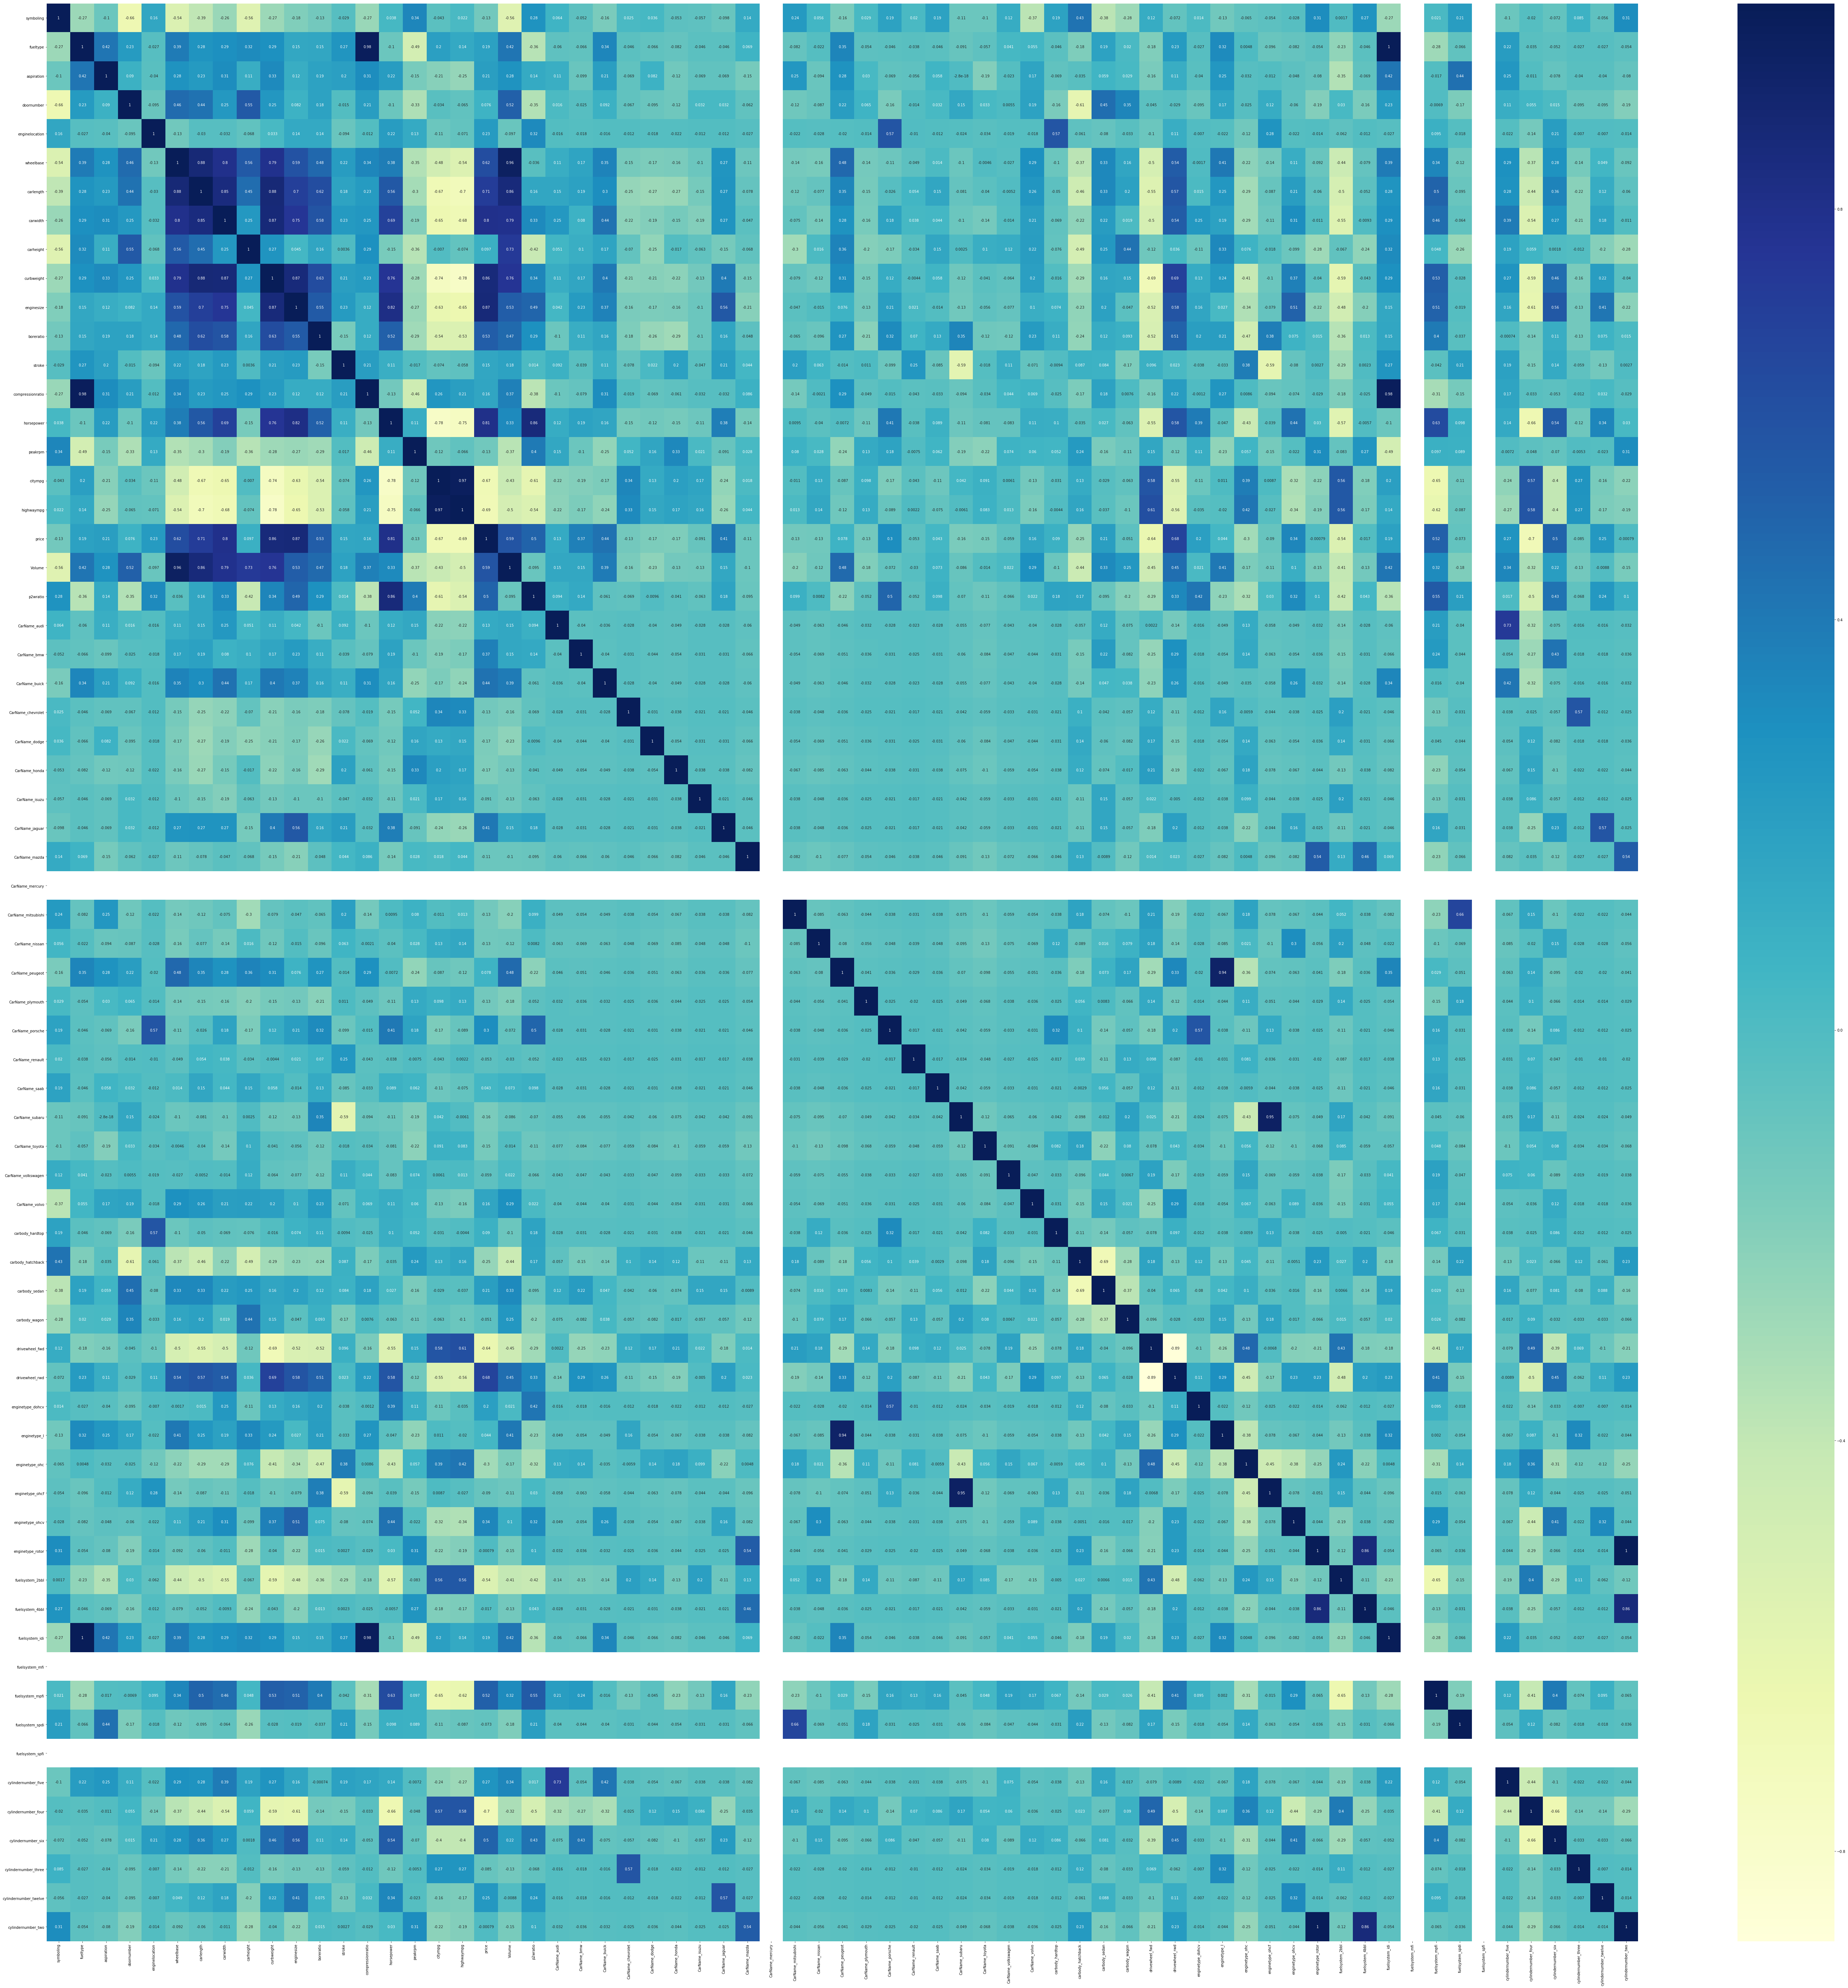

In [229]:
# Let's check the heatmap

plt.figure(figsize = (100, 100))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

The few variables which are highly correlated with price are enginesize, curbweight, horsepower, drivewheel_rwd.

### Dividing into X and Y sets for the model building

In [230]:
#Creating a copy of train dataset for future use
df_train_temp = df_train.copy()

In [231]:
df_train = df_train_temp.copy()

In [232]:
#Creating predictor array and response array
y_train = df_train.pop('price')
X_train = df_train

## Building our model

Using Linear Regression with RFE as the number of variable are very high

### RFE
Recursive feature elimination

In [233]:
#Importing LinearRegression and RFE from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [234]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [235]:
#Printing list of variables with their importance as selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 18),
 ('aspiration', False, 16),
 ('doornumber', False, 52),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', False, 26),
 ('carheight', True, 1),
 ('curbweight', False, 8),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 20),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('citympg', False, 33),
 ('highwaympg', False, 50),
 ('Volume', True, 1),
 ('p2wratio', True, 1),
 ('CarName_audi', False, 34),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 32),
 ('CarName_chevrolet', False, 53),
 ('CarName_dodge', False, 23),
 ('CarName_honda', False, 29),
 ('CarName_isuzu', False, 38),
 ('CarName_jaguar', False, 28),
 ('CarName_mazda', False, 35),
 ('CarName_mercury', False, 46),
 ('CarName_mitsubishi', False, 17),
 ('CarName_nissan', False, 37),
 ('CarName_peugeot', False, 7),
 ('CarName_plymouth', False, 22),
 ('CarName_porsche', False, 

In [236]:
#List of top 12 columns as selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carheight', 'enginesize', 'boreratio',
       'horsepower', 'Volume', 'p2wratio', 'CarName_bmw', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [237]:
#Correlation of all the variables selected by RFE with price
corr_i.iloc[rfe.support_].sort_values(ascending = False)

price                   1.000000
enginesize              0.867915
horsepower              0.806183
wheelbase               0.622591
Volume                  0.586028
boreratio               0.533591
cylindernumber_six      0.500613
enginetype_ohcv         0.339468
enginelocation          0.226217
CarName_audi            0.131449
carheight               0.096631
cylindernumber_three   -0.085274
Name: price, dtype: float64

In [238]:
#List of columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carlength',
       'carwidth', 'curbweight', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'highwaympg', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'cylindernumber_five', 'cylindernumbe

### Building model using statsmodel, for the detailed statistics

#### Running first model (lm_0) with all  the columns selected by RFE

In [239]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [240]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [241]:
# Running the linear model
lm_0 = sm.OLS(y_train,X_train_rfe).fit()   

In [242]:
#Let's see the summary of our linear model
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.05e-64
Time:                        13:38:36   Log-Likelihood:                 194.54
No. Observations:                 143   AIC:                            -363.1
Df Residuals:                     130   BIC:                            -324.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [243]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                   const  109.64
7                  Volume   65.88
6              horsepower   44.75
2               wheelbase   34.63
8                p2wratio   23.04
4              enginesize   11.75
3               carheight   10.23
5               boreratio    1.70
10       enginetype_rotor    1.63
12  cylindernumber_twelve    1.44
1          enginelocation    1.34
9             CarName_bmw    1.23
11   cylindernumber_three    1.04

Since cylindernumber_twelve is insignificant due to its high p-value, hence dropping the column

#### Running second model (lm_1) dropping cylindernumber_tweleve column

In [244]:
#Dropping insignificant column
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [245]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_new)

In [246]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   

In [247]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.75e-64
Time:                        13:38:50   Log-Likelihood:                 193.20
No. Observations:                 143   AIC:                            -362.4
Df Residuals:                     131   BIC:                            -326.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2370 

In [248]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const  109.44
7                 Volume   64.32
6             horsepower   44.62
2              wheelbase   34.40
8               p2wratio   22.95
4             enginesize   10.96
3              carheight   10.09
5              boreratio    1.67
10      enginetype_rotor    1.61
1         enginelocation    1.32
9            CarName_bmw    1.20
11  cylindernumber_three    1.04

Now the boreratio has become insignificant with a p-value of 0.053 > 0.05, hence dropping the column. Not considering the VIF for now until all the insignificant columns are dropped one by one

#### Running third model (lm_2) dropping boreratio column

In [249]:
#Dropping boreratio column
X_train_new = X_train_new.drop(['boreratio'], axis = 1)

In [250]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_new)

In [251]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit() 

In [252]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           9.35e-65
Time:                        13:39:49   Log-Likelihood:                 191.15
No. Observations:                 143   AIC:                            -360.3
Df Residuals:                     132   BIC:                            -327.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2075 

In [253]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                  const  101.83
6                 Volume   63.86
5             horsepower   43.77
2              wheelbase   34.32
7               p2wratio   22.69
4             enginesize   10.96
3              carheight   10.06
9       enginetype_rotor    1.60
1         enginelocation    1.30
8            CarName_bmw    1.20
10  cylindernumber_three    1.04

Now since there are no insignificant columns left. Checking for multicolinearity, the VIF value for the const is very high. Hence dropping the const column

#### Running fourth model (lm_3) dropping the const column

In [254]:
#Dropping the const column
X_train_new = X_train_new.drop(['const'], axis = 1)

In [256]:

import statsmodels.api as sm  
X_train_lm_3 = X_train_new
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.23e-83
Time:                        13:41:01   Log-Likelihood:                 184.04
No. Observations:                 143   AIC:                            -348.1
Df Residuals:                     133   BIC:                            -318.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
enginelocation           0.3677 

In [257]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5                Volume  206.21
1             wheelbase  132.40
4            horsepower   76.18
6              p2wratio   56.90
2             carheight   39.68
3            enginesize   23.23
8      enginetype_rotor    1.38
0        enginelocation    1.20
7           CarName_bmw    1.11
9  cylindernumber_three    1.05

Here p2wratio and horsepower have both become insignificant. However, horsepower has higher correlation with price column as compared to p2wratio. Hence dropping p2wratio. From now onward, the model is trained without adding const as const has a very high VIF.

#### Running fifth model (lm_4) dropping p2wratio column

In [258]:
X_train_new = X_train_new.drop(['p2wratio'], axis = 1)

In [259]:
import statsmodels.api as sm 
#Not adding const now
X_train_lm_4 = X_train_new
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     299.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.94e-84
Time:                        13:42:19   Log-Likelihood:                 183.91
No. Observations:                 143   AIC:                            -349.8
Df Residuals:                     134   BIC:                            -323.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
enginelocation           0.3616 

Here the variance have remained same but the BIC has improved

In [260]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1             wheelbase  63.40
5                Volume  59.96
3            enginesize  18.27
4            horsepower  10.86
2             carheight   9.28
7      enginetype_rotor   1.37
0        enginelocation   1.16
6           CarName_bmw   1.10
8  cylindernumber_three   1.04

Since the wheelbase have high VIF  >> 10. Hence dropping the column

#### Running sixth model (lm_5) dropping wheelbase column

In [261]:
X_train_new = X_train_new.drop(['wheelbase'], axis = 1)

In [262]:
import statsmodels.api as sm  
X_train_lm_5 = X_train_new
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.25e-79
Time:                        13:42:47   Log-Likelihood:                 169.77
No. Observations:                 143   AIC:                            -323.5
Df Residuals:                     135   BIC:                            -299.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
enginelocation           0.4346 

In [263]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2            enginesize  16.05
4                Volume  15.19
3            horsepower  10.84
1             carheight   9.28
6      enginetype_rotor   1.21
0        enginelocation   1.13
5           CarName_bmw   1.10
7  cylindernumber_three   1.04

Now the cylindernumber_three column has become insignificant. Hence dropping this column

#### Running seventh model (lm_6) dropping cylindernumber_three column

In [264]:
X_train_new = X_train_new.drop(['cylindernumber_three'], axis = 1)

In [265]:
import statsmodels.api as sm  
X_train_lm_6= X_train_new
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     308.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.45e-80
Time:                        13:43:00   Log-Likelihood:                 168.05
No. Observations:                 143   AIC:                            -322.1
Df Residuals:                     136   BIC:                            -301.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginelocation       0.4308      0.081  

In [266]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        enginesize  16.05
4            Volume  14.82
3        horsepower  10.84
1         carheight   8.93
6  enginetype_rotor   1.21
0    enginelocation   1.12
5       CarName_bmw   1.10

None of the column is insignificant. However, enginesize column has a high VIF and thus multicolinearity. Hence dropping this column

#### Running eighth model (lm_7) dropping enginesize column

In [267]:
X_train_new = X_train_new.drop(['enginesize'], axis = 1)

In [268]:
 import statsmodels.api as sm  
X_train_lm_7 = X_train_new
lm_7 = sm.OLS(y_train,X_train_lm_7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     285.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.83e-75
Time:                        13:43:14   Log-Likelihood:                 152.03
No. Observations:                 143   AIC:                            -292.1
Df Residuals:                     137   BIC:                            -274.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginelocation       0.4408      0.091  

In [269]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            Volume  12.29
1         carheight   8.83
2        horsepower   3.25
0    enginelocation   1.12
4       CarName_bmw   1.09
5  enginetype_rotor   1.04

Now the enginetype_rotor column has become insignificant due to high p-value. Hence dropping the column

#### Running ninth model (lm_8) dropping enginetype_rotor column

In [270]:
X_train_new = X_train_new.drop(['enginetype_rotor'], axis = 1)

In [271]:
 import statsmodels.api as sm  
X_train_lm_8 = X_train_new
lm_8 = sm.OLS(y_train,X_train_lm_8).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.04e-76
Time:                        13:43:28   Log-Likelihood:                 152.02
No. Observations:                 143   AIC:                            -294.0
Df Residuals:                     138   BIC:                            -279.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.4401      0.090      4.

In [272]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          Volume  12.27
1       carheight   8.83
2      horsepower   3.16
0  enginelocation   1.12
4     CarName_bmw   1.09

Here Volume has high VIF value. However, CarName_bmw is the name of the car and from business point of view will not help Geely auto to pedict price as it is exogenous to Geely auto. Hence first dropping the CarName_bmw variable and checking its impact on VIF of Volumne variable. Here we are preferring Volume because this variable is under the control of Geely Auto

#### Running tenth model (lm_9) dropping CarName_bmw column

In [273]:
X_train_new = X_train_new.drop(['CarName_bmw'], axis = 1)

In [274]:
import statsmodels.api as sm  
X_train_lm_9 = X_train_new
lm_9 = sm.OLS(y_train,X_train_lm_9).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     319.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.13e-69
Time:                        13:43:50   Log-Likelihood:                 131.97
No. Observations:                 143   AIC:                            -255.9
Df Residuals:                     139   BIC:                            -244.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.4120      0.103      3.

In [275]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          Volume  12.27
1       carheight   8.83
2      horsepower   3.10
0  enginelocation   1.12

In [276]:
corr_i['carheight']

0.09663101035836795

In [277]:
corr_i['Volume']

0.5860283537790322

Again removing carheight with high VIF and keeping Volume variable as it has higher correlation with price variable as compared to carheight variable

#### Running eleventh model (lm_10) dropping carheight column

In [278]:
X_train_new = X_train_new.drop(['carheight'], axis = 1) 
import statsmodels.api as sm  
X_train_lm_10 = X_train_new
lm_10 = sm.OLS(y_train,X_train_lm_10).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     288.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.02e-59
Time:                        13:44:16   Log-Likelihood:                 106.90
No. Observations:                 143   AIC:                            -207.8
Df Residuals:                     140   BIC:                            -198.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.3003      0.121      2.

In [279]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1      horsepower  2.97
2          Volume  2.86
0  enginelocation  1.10

Now all the features are significant and the VIF of all of them is under 3. Lets check by few more variables if the Adj. R-squared and AIC improves while keeping VIF and p-value under check

In [280]:
#Considering only those columns which have a good correlation with price i.e above 0.3 and below -0.3
high_corr = corr_i[(corr_i > 0.3) | (corr_i < -0.3)].sort_values(ascending = False)

In [281]:
#Considering only those columns which makes business sense to Geely auto
high_corr = high_corr[~high_corr.index.str.startswith('CarName')]
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

#### Running twelfth model (lm_11) adding curbweight column

Taking a copy of train set as this set contains variable which seems to be good predictor and carrying forward with experimenting while keeping this copy

In [282]:
model11_x = X_train_new.copy()

In [283]:
X_train_new = model11_x

Not considering enginesize as we have dropped it already.Taking curbweight as it shows a good correlation with the price 

In [284]:
#Adding curbweight to the current train dataset
X_train_new = pd.concat([X_train_new,df_train_temp['curbweight']], axis = 1)

In [285]:
import statsmodels.api as sm  
X_train_lm_11 = X_train_new
lm_11 = sm.OLS(y_train,X_train_lm_11).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     231.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.35e-60
Time:                        13:45:33   Log-Likelihood:                 111.42
No. Observations:                 143   AIC:                            -214.8
Df Residuals:                     139   BIC:                            -203.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.3380      0.119      2.

In [286]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3      curbweight  35.32
2          Volume  13.89
1      horsepower  11.23
0  enginelocation   1.11

Since the introduction of curbweight have made one of the feature insignificant. Hence we will not consider this column

#### Running thirteenth model (lm_12) dropping carheight column

In [287]:
X_train_new = model11_x

In [288]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

In [289]:
corr_all['carwidth']['Volume']

0.7887184142208477

In [290]:
corr_all['carlength']['Volume']

0.8641294346634422

horsepower is already present in our feature set. carwidth is considered in Volume and carlength has high correlation with Volume hence not considering these columns. The next column is drivewheel_rwd. Hence considering it.

In [291]:
X_train_new = pd.concat([X_train_new,df_train_temp['drivewheel_rwd']], axis = 1)

In [292]:
import statsmodels.api as sm  
X_train_lm_12 = X_train_new
lm_12 = sm.OLS(y_train,X_train_lm_12).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.73e-63
Time:                        13:45:59   Log-Likelihood:                 118.38
No. Observations:                 143   AIC:                            -228.8
Df Residuals:                     139   BIC:                            -216.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.2747      0.112      2.

In [293]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1      horsepower  3.66
2          Volume  3.04
3  drivewheel_rwd  2.45
0  enginelocation  1.10

drivewheel_rwd has improved both the Adj. R-squared and AIC and all the variables are significant and VIF is under acceptable range. Hence considering it for our model

In [294]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

wheelbase is already considered in Volume. boreratio has been deleted earlier as it was not significant. Now adding fuelsystem_mpfi into the model and checking.

#### Running fourteenth model (lm_13) adding fuelsystem_mpfi  column

In [295]:
model14_x = X_train_new.copy()

In [296]:
X_train_new = pd.concat([X_train_new,df_train_temp['fuelsystem_mpfi']], axis = 1)

In [298]:
import statsmodels.api as sm  
X_train_lm_13 = X_train_new
lm_13 = sm.OLS(y_train,X_train_lm_13).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.92e-62
Time:                        13:47:58   Log-Likelihood:                 118.57
No. Observations:                 143   AIC:                            -227.1
Df Residuals:                     138   BIC:                            -212.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.2722      0.113     

Since fuelsystem_mpfi has become insignificant on addition as its p-value = 0.551 > 0.05. Hence no need to check the VIF as well. Not keeping this variable for the final model

In [299]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

In [300]:
corr_all['p2wratio']['horsepower']

0.8629223548833058

p2wratio we have alreay dropped earlier and also it has high correlation with horsepower. Hence not considering it. Going with cylindernumber_six for next model

#### Running fifteenth model (lm_14) adding cylindernumber_six  column

In [301]:
X_train_new = model14_x

In [302]:
X_train_new = pd.concat([X_train_new,df_train_temp['cylindernumber_six']], axis = 1)

In [303]:
import statsmodels.api as sm  
X_train_lm_14 = X_train_new
lm_14 = sm.OLS(y_train,X_train_lm_14).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     208.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.84e-62
Time:                        13:48:54   Log-Likelihood:                 119.35
No. Observations:                 143   AIC:                            -228.7
Df Residuals:                     138   BIC:                            -213.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
enginelocation         0.2568      0

Since cylindernumber_six has become insignificant on addition as its p-value = 0.172 > 0.05. Hence no need to check the VIF as well. Not keeping this variable for the final model

In [304]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Considering enginetype_ohcv for our next model.

#### Running sixteenth model (lm_15) adding enginetype_ohcv  column

In [305]:
X_train_new = model14_x

In [306]:
X_train_new = pd.concat([X_train_new,df_train_temp['enginetype_ohcv']], axis = 1)

In [307]:
import statsmodels.api as sm  
X_train_lm_15 = X_train_new
lm_15 = sm.OLS(y_train,X_train_lm_15).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.37e-62
Time:                        13:49:13   Log-Likelihood:                 119.09
No. Observations:                 143   AIC:                            -228.2
Df Residuals:                     138   BIC:                            -213.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.2944      0.113     

Since enginetype_ohcv has become insignificant on addition as its p-value = 0.243 > 0.05. Hence no need to check the VIF as well. Not keeping this variable for the final model

In [308]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Considering fuelsystem_2bbl for the next model

#### Running seventeenth model (lm_16) adding fuelsystem_2bbl  column

In [309]:
X_train_new = model14_x

In [310]:
X_train_new = pd.concat([X_train_new,df_train_temp['fuelsystem_2bbl']], axis = 1)

In [311]:
import statsmodels.api as sm  
X_train_lm_16 = X_train_new
lm_16 = sm.OLS(y_train,X_train_lm_16).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.94e-64
Time:                        13:49:38   Log-Likelihood:                 124.09
No. Observations:                 143   AIC:                            -238.2
Df Residuals:                     138   BIC:                            -223.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.2890      0.108     

In [312]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1       horsepower  3.66
2           Volume  3.48
3   drivewheel_rwd  2.65
4  fuelsystem_2bbl  1.24
0   enginelocation  1.10

This model has all significant features and the VIF is under acceptable range. Also the Adj. R-squared and AIC have improved. Hence keeping this feature

In [313]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Considering drivewheel_fwd for next iteration.

#### Running eighteenth model (lm_17) adding  drivewheel_fwd  column

In [314]:
model18_x = X_train_new.copy()

In [315]:
X_train_new = pd.concat([X_train_new,df_train_temp['drivewheel_fwd']], axis = 1)

In [316]:
import statsmodels.api as sm  
X_train_lm_17 = X_train_new
lm_17 = sm.OLS(y_train,X_train_lm_17).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.93e-65
Time:                        13:49:59   Log-Likelihood:                 129.39
No. Observations:                 143   AIC:                            -246.8
Df Residuals:                     137   BIC:                            -229.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.2860      0.105     

Since drivewheel_fwd has made two variables insignificant on addition. It is not suitable to consider. Hence no need to check the VIF as well. Not keeping this variable for the final model

In [317]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Considering citympg for next iteration

#### Running nineteenth model (lm_18) adding citympg  column

In [318]:
X_train_new = model18_x

In [319]:
X_train_new = pd.concat([X_train_new,df_train_temp['citympg']], axis = 1)

In [320]:
import statsmodels.api as sm  
X_train_lm_18 = X_train_new
lm_18 = sm.OLS(y_train,X_train_lm_18).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.90e-65
Time:                        13:50:12   Log-Likelihood:                 128.42
No. Observations:                 143   AIC:                            -244.8
Df Residuals:                     137   BIC:                            -227.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.2961      0.106     

Since citympg have also made fuelsystem_2bbl insignificant, hence not considering it.

In [321]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

considering highwaympg for next iteration

#### Running twentieth model (lm_19) adding highwaympg  column

In [322]:
X_train_new = model18_x

In [323]:
X_train_new = pd.concat([X_train_new,df_train_temp['highwaympg']], axis = 1)

In [324]:
import statsmodels.api as sm  
X_train_lm_19 = X_train_new
lm_19 = sm.OLS(y_train,X_train_lm_19).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     201.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.14e-65
Time:                        13:50:29   Log-Likelihood:                 129.28
No. Observations:                 143   AIC:                            -246.6
Df Residuals:                     137   BIC:                            -228.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
enginelocation      0.3004      0.105     

The intoduction of highwaympg has made fuelsystem_2bbl highly insignificant. However, highwaympg have higher negative correlation with price as compared to fuelsystem_2bbl hence considering it for next iteration and dropping fuelsystem_2bbl

In [325]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           Volume  4.13
1       horsepower  3.74
5       highwaympg  3.71
3   drivewheel_rwd  2.69
4  fuelsystem_2bbl  2.41
0   enginelocation  1.10

#### Running twentyfirst model (lm_20) dropping  fuelsystem_2bbl  column

In [326]:
X_train_new = X_train_new.drop('fuelsystem_2bbl', axis = 1)

In [327]:
import statsmodels.api as sm  
X_train_lm_20 = X_train_new
lm_20 = sm.OLS(y_train,X_train_lm_20).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.35e-66
Time:                        13:50:47   Log-Likelihood:                 129.24
No. Observations:                 143   AIC:                            -248.5
Df Residuals:                     138   BIC:                            -233.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
enginelocation     0.3002      0.105      2.

In [328]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          Volume  4.12
1      horsepower  3.71
3  drivewheel_rwd  2.65
4      highwaympg  1.91
0  enginelocation  1.10

We can see all the parameters are significant and the VIF is also in acceptable range. The Adj. R-sqaured and AIC have improved as compared to the model where fuelsystem_2bbl was there in place of highwaympg

In [329]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Next considering cylindernumber_four in the model

#### Running twentysecond model (lm_21) adding  cylindernumber_four column

In [330]:
X_train_new = pd.concat([X_train_new,df_train_temp['cylindernumber_four']], axis = 1)

In [331]:
import statsmodels.api as sm  
X_train_lm_21 = X_train_new
lm_21 = sm.OLS(y_train,X_train_lm_21).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     239.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.12e-70
Time:                        13:51:06   Log-Likelihood:                 140.42
No. Observations:                 143   AIC:                            -268.8
Df Residuals:                     137   BIC:                            -251.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.2749    

In [332]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5  cylindernumber_four  5.71
4           highwaympg  5.61
2               Volume  4.36
1           horsepower  3.71
3       drivewheel_rwd  2.70
0       enginelocation  1.10

In [333]:
high_corr

price                  1.000000
enginesize             0.867915
curbweight             0.861860
horsepower             0.806183
carwidth               0.799380
carlength              0.713749
drivewheel_rwd         0.677169
wheelbase              0.622591
Volume                 0.586028
boreratio              0.533591
fuelsystem_mpfi        0.519993
p2wratio               0.502558
cylindernumber_six     0.500613
enginetype_ohcv        0.339468
fuelsystem_2bbl       -0.537919
drivewheel_fwd        -0.635202
citympg               -0.674290
highwaympg            -0.688389
cylindernumber_four   -0.695256
Name: price, dtype: float64

Since highwaympg have become insignificant and cylindernumber_four has higher negative correlation with price as compared to highwaympg. Hence dropping highwaympg and keeping cylindernumber_four.

#### Running twentythird model (lm_22) dropping highwaympg  column

In [334]:
model22_x = X_train_new.copy()

In [335]:
X_train_new = X_train_new.drop('highwaympg', axis = 1)

In [336]:
import statsmodels.api as sm  
X_train_lm_22 = X_train_new
lm_22 = sm.OLS(y_train,X_train_lm_22).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     287.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.36e-71
Time:                        13:51:28   Log-Likelihood:                 139.99
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     138   BIC:                            -255.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.2815    

In [337]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Volume  4.32
1           horsepower  3.68
3       drivewheel_rwd  2.69
4  cylindernumber_four  1.95
0       enginelocation  1.10

This is the model where all the parameters are significant and VIF is under acceptable range. Also the variables having high correlation with price are all considered by now. The Adj. R-squared and AIC are also good. Considering this as the final model and going ahead with residual analysis and final prediction

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed and let us plot the histogram of the error terms and see what it looks like, to check whether this assumption is valid or not.

In [338]:
y_train_price = lm_22.predict(X_train_lm_22)

Text(0.5, 0, 'Errors')

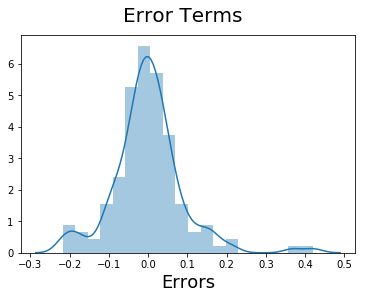

In [339]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

As we can see above, the error terms are approximately normally distributed with mean 0. Hence assumption stands valid. Now going ahead with making prediction.

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. twentythird model.

#### Applying the scaling on the test sets

In [340]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'Volume','p2wratio','carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [341]:
df_test.describe()

symboling   fueltype  aspiration  doornumber  enginelocation  \
count  62.000000  62.000000   62.000000   62.000000       62.000000   
mean    0.583871   0.112903    0.177419    0.564516        0.032258   
std     0.271724   0.319058    0.385142    0.499868        0.178127   
min     0.000000   0.000000    0.000000    0.000000        0.000000   
25%     0.400000   0.000000    0.000000    0.000000        0.000000   
50%     0.600000   0.000000    0.000000    1.000000        0.000000   
75%     0.800000   0.000000    0.000000    1.000000        0.000000   
max     1.000000   1.000000    1.000000    1.000000        1.000000   

       wheelbase  carlength   carwidth  carheight  curbweight  \
count  62.000000  62.000000  62.000000  62.000000   62.000000   
mean    0.437764   0.559481   0.480376   0.559663    0.428470   
std     0.212861   0.189947   0.165440   0.215811    0.179488   
min     0.000000   0.056911   0.183333   0.141593    0.128394   
25%     0.313793   0.459350   0.358333   0.384956    0.305275   
50%     0.387931   0.547967   0.441667   0.588496    0.406129   
75%     0.570690   0.719919   0.516667   0.699115    0.564876   
max     1.182759   1.089431   0.975000   1.061947    0.935609   

              ...          fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
count         ...               62.000000        62.000000        62.000000   
mean          ...                0.016129         0.500000         0.048387   
std           ...                0.127000         0.504082         0.216335   
min           ...                0.000000         0.000000         0.000000   
25%           ...                0.000000         0.000000         0.000000   
50%           ...                0.000000         0.500000         0.000000   
75%           ...                0.000000         1.000000         0.000000   
max           ...                1.000000         1.000000         1.000000   

       fuelsystem_spfi  cylindernumber_five  cylindernumber_four  \
count        62.000000            62.000000            62.000000   
mean          0.016129             0.032258             0.854839   
std           0.127000             0.178127             0.355139   
min           0.000000             0.000000             0.000000   
25%           0.000000             0.000000             1.000000   
50%           0.000000             0.000000             1.000000   
75%           0.000000             0.000000             1.000000   
max           1.000000             1.000000             1.000000   

       cylindernumber_six  cylindernumber_three  cylindernumber_twelve  \
count           62.000000                  62.0                   62.0   
mean             0.080645                   0.0                    0.0   
std              0.274512                   0.0                    0.0   
min              0.000000                   0.0                    0.0   
25%              0.000000                   0.0                    0.0   
50%              0.000000                   0.0                    0.0   
75%              0.000000                   0.0                    0.0   
max              1.000000                   0.0                    0.0   

       cylindernumber_two  
count                62.0  
mean                  0.0  
std                   0.0  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   0.0  
max                   0.0  

[8 rows x 67 columns]

#### Dividing into X_test and y_test

In [342]:
y_test = df_test.pop('price')
X_test = df_test

In [343]:
# Taking only final relevant feature variables in test dataframe
X_test_final = X_test[['horsepower','Volume','enginelocation','drivewheel_rwd','cylindernumber_four']]

In [344]:
# Making predictions using the final model

y_pred = lm_22.predict(X_test_final)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

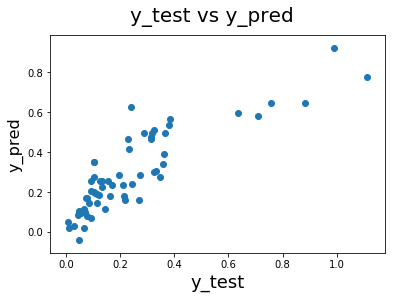

In [345]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [346]:
#Calculating the r2 score for the test prediction
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6931656463856115

the final r2 score is ~0.7

In [347]:
lm_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     287.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.36e-71
Time:                        13:52:40   Log-Likelihood:                 139.99
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     138   BIC:                            -255.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.2815      0.097      2.903      0.004       0.090       0.473
horsepower              0.6146      0.053     11.621      0.000       0.510       0.719
Volume                  0.3115      0.037      8.401      0.000       0.238       0.385
drivewheel_rwd          0.0725      0.021      3.380      0.001       0.030       0.115
cylindernumber_four    -0.0875      0.013     -6.977      0.000      -0.112      -0.063
==============================================================================
Omnibus:                       37.691   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.564
Skew:                           0.928   Prob(JB):                     1.99e-28
Kurtosis:                       7.239   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


We can see that the equation of our best fitted line is:

$ price = 0.281  \times  eniginelocation + 0.615  \times  horsepower + 0.311 \times Volume + 0.072 \times drivewheel\_rwd - 0.087 \times cylindernumber\_four $


The final feature variables which are present in our final equation are :
1. enginelocation
2. horsepower
3. Volume( wheelbase x carwidth x carheight)
4. drivewheel_rwd
5. cylindernumber_four

These variables have covered around  90% variance in the train data set and 70% variance in the test data set